#Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import sklearn.decomposition

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:1000,:]
sub_labels = train_labels[:1000]

#1a

Text(0, 0.5, 'Percent Variance')

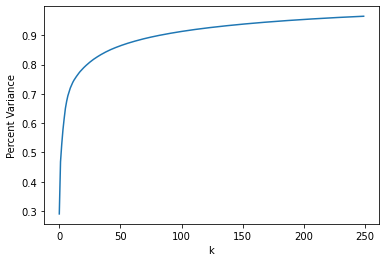

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

#Finding k
#X_tilda = U S V'
k=250 #random large k
svd = sklearn.decomposition.TruncatedSVD(n_components = k,random_state = 27)
svd.fit(X_tilda)
evr = svd.explained_variance_ratio_
cum_sum = [0]
for i in evr: cum_sum.append(cum_sum[-1]+i) 
cum_sum = cum_sum[1:] #removes the 0 put there earlier

plt.plot(range(len(cum_sum)), cum_sum)
plt.xlabel('k')
plt.ylabel('Percent Variance')
#cum_sum[186],cum_sum[187] bounds .95
#choose k=187 

In [ ]:
k=187
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

Y_test.shape

In [ ]:
acc=[]

for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Y_train, train_labels)
    y_preds = model.predict(Y_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    acc.append(score)
    print('K is',k,'\n acc is:', score)

In [ ]:
#KNN Accuracy with PCA(95%)
acc=[0.852,0.8517,0.8601,0.8648,0.8618,0.8625,
     0.8626,0.8616,0.8609,0.8623,0.8595,0.8586]

#plots
plt.plot(range(1,13), 1 - np.array(acc), '-bs', label='PCA(95%) + KNN')
plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#1b

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

trial_bs=[180]
acc_mat =np.zeros([len(trial_bs),12]) 
for a in range(len(trial_bs)):
    b=trial_bs[a]
    PCA = sklearn.decomposition.PCA(n_components = b)
    PCA.fit(X_tilda)
    Y_train = PCA.transform(X_tilda)
    Y_test = PCA.transform(X_test_centered)

    for k in range(1,13):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Y_train, train_labels)
        y_preds = model.predict(Y_test)
        score=accuracy_score(y_true=test_labels, y_pred=y_preds)
        print('b is:',b,'K is:',k,'\n acc is:', score)
        acc_mat[a,k-1] = score

print(acc_mat)

In [ ]:
b_50 = [0.8423, 0.8418, 0.8517, 0.8573, 0.8563, 0.8586,
        0.8589, 0.8587, 0.8556, 0.8576, 0.8577, 0.8564]
b_75 = [0.8406, 0.8422, 0.8518, 0.8566, 0.8568, 0.8586,
        0.8591, 0.8581, 0.8571, 0.8571, 0.8563, 0.8559]
b_100= [0.8499, 0.8491, 0.86, 0.8626, 0.8624, 0.8629,
        0.8597, 0.8614, 0.8598, 0.8607, 0.8589, 0.8594]
b_125= [0.8502, 0.85  , 0.8592, 0.8628, 0.8626, 0.8621,
        0.8605, 0.8625, 0.8603, 0.861 , 0.8609, 0.8592]
b_150= [0.8528, 0.8518, 0.8586, 0.8631, 0.8633, 0.8634,
        0.8634, 0.8641, 0.8614, 0.8633, 0.8591, 0.8607]
b_160= [0.8535, 0.8522, 0.861,  0.8641, 0.8631, 0.8639,
        0.8622, 0.8627, 0.8608, 0.8629, 0.8599, 0.8607]
b_170= [0.8515, 0.853 , 0.8594, 0.8622, 0.8629, 0.8636,
        0.8614, 0.8623, 0.8602, 0.8612, 0.8586, 0.8598]
b_180= [0.8519, 0.852 , 0.8588, 0.8633, 0.8627, 0.8634,
        0.8628, 0.8628, 0.8611, 0.8621, 0.8602, 0.8588]
b_200= [0.8524, 0.8524, 0.8595, 0.8633, 0.8649, 0.8632,
        0.8602, 0.863 , 0.8615, 0.8634, 0.8597, 0.8605]
acc=    [0.852, 0.8517, 0.8601, 0.8648, 0.8618, 0.8625,
         0.8626,0.8616, 0.8609, 0.8623, 0.8595, 0.8586]

In [ ]:
b_50_error = 1-np.array(b_50)
b_75_error = 1-np.array(b_75)
b_100_error = 1-np.array(b_100)
b_125_error = 1-np.array(b_125)

#plots
plt.plot(range(1,13), b_50_error, '-bs', label='B = 50')
plt.plot(range(1,13), b_75_error,'-rs', label = 'B = 75')
plt.plot(range(1,13), b_100_error,'-gs', label = 'B = 100')
plt.plot(range(1,13), b_125_error, '-ks', label='B = 125')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

In [ ]:
b_150_error = 1-np.array(b_150)
b_160_error = 1-np.array(b_160)
b_170_error = 1-np.array(b_170)
b_180_error = 1-np.array(b_180)

#plots
plt.plot(range(1,13), b_150_error, '-bs', label='B = 150')
plt.plot(range(1,13), b_160_error,'-rs', label = 'B = 160')
plt.plot(range(1,13), b_170_error,'-gs', label = 'B = 170')
plt.plot(range(1,13), b_180_error, '-ks', label='B = 180')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

In [ ]:
b_200_error = 1-np.array(b_200)
error = 1-np.array(acc)

#plots
plt.plot(range(1,13), b_200_error, '-bs', label='B = 200')
plt.plot(range(1,13), error,'-rs', label = 'PCA(95%)')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

In [ ]:
non_pca_acc=[0.8497,0.846,0.8541,0.8577,0.8554,0.8544,
          0.854,0.8534,0.8519,0.8515,0.8495,0.8471]

non_pca_error = 1-np.array(non_pca_acc)

plt.plot(range(1,13), non_pca_error, '-bs', label='Non-PCA')
plt.plot(range(1,13), error,'-rs', label = 'PCA(95%)')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#2

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

k=180 #ran with 187 before, now 160
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

G0 = Y_train[train_labels==0,:]
G1 = Y_train[train_labels==1,:]
G2 = Y_train[train_labels==2,:]
G3 = Y_train[train_labels==3,:]
G4 = Y_train[train_labels==4,:]
G5 = Y_train[train_labels==5,:]
G6 = Y_train[train_labels==6,:]
G7 = Y_train[train_labels==7,:]
G8 = Y_train[train_labels==8,:]
G9 = Y_train[train_labels==9,:]

In [ ]:
#let k=1
#find dist from k to all train points
#find clostsest 1 from each group
#find centroid
#find dist from k to each centroid
#find smallest distance
#arg min to find prediction

#k=2 
#find next closest
#find centroid
#find dist from test point to each centroid
#find smallest distance
#arg min to find prediction
#... repeat for k 3:12

#
#compute all dists
#find top 12 closest indices


#
pred_mat = np.zeros([10000,12]) #columns are k=1...12

for r in range(Y_test.shape[0]): 


    G0_dists, G1_dists, G2_dists, G3_dists, G4_dists = [],[],[],[],[] 
    G5_dists, G6_dists, G7_dists, G8_dists, G9_dists = [],[],[],[],[]
    closest_img_index_G0, closest_img_index_G1, closest_img_index_G2 = [],[],[]
    closest_img_index_G3, closest_img_index_G4, closest_img_index_G5= [],[],[]
    closest_img_index_G6, closest_img_index_G7, closest_img_index_G8  = [],[],[]
    closest_img_index_G9 = []

    test_point = Y_test[r,:]

    #finds all distances, only run once
    for i in range(G0.shape[0]):
        G0_dists.append( np.sqrt(np.sum((  test_point - G0[i,:]  )**2)) )
        G1_dists.append( np.sqrt(np.sum((  test_point - G1[i,:]  )**2)) )
        G2_dists.append( np.sqrt(np.sum((  test_point - G2[i,:]  )**2)) )
        G3_dists.append( np.sqrt(np.sum((  test_point - G3[i,:]  )**2)) )
        G4_dists.append( np.sqrt(np.sum((  test_point - G4[i,:]  )**2)) )
        G5_dists.append( np.sqrt(np.sum((  test_point - G5[i,:]  )**2)) )
        G6_dists.append( np.sqrt(np.sum((  test_point - G6[i,:]  )**2)) )
        G7_dists.append( np.sqrt(np.sum((  test_point - G7[i,:]  )**2)) )
        G8_dists.append( np.sqrt(np.sum((  test_point - G8[i,:]  )**2)) )
        G9_dists.append( np.sqrt(np.sum((  test_point - G9[i,:]  )**2)) )

    for k in range(12):
        i0=np.argmin(G0_dists)
        i1=np.argmin(G1_dists)
        i2=np.argmin(G2_dists)
        i3=np.argmin(G3_dists)
        i4=np.argmin(G4_dists)
        i5=np.argmin(G5_dists)
        i6=np.argmin(G6_dists)
        i7=np.argmin(G7_dists)
        i8=np.argmin(G8_dists)
        i9=np.argmin(G9_dists)
        closest_img_index_G0.append(i0)
        closest_img_index_G1.append(i1)
        closest_img_index_G2.append(i2)
        closest_img_index_G3.append(i3)
        closest_img_index_G4.append(i4)
        closest_img_index_G5.append(i5)
        closest_img_index_G6.append(i6)
        closest_img_index_G7.append(i7)
        closest_img_index_G8.append(i8)
        closest_img_index_G9.append(i9)
        G0_dists[i0] = np.Inf
        G1_dists[i1] = np.Inf
        G2_dists[i2] = np.Inf
        G3_dists[i3] = np.Inf
        G4_dists[i4] = np.Inf
        G5_dists[i5] = np.Inf
        G6_dists[i6] = np.Inf
        G7_dists[i7] = np.Inf
        G8_dists[i8] = np.Inf
        G9_dists[i9] = np.Inf
        c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
        c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
        c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
        c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
        c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
        c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
        c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
        c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
        c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
        c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

        test_to_centroids_dists = []
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

        #find pred
        pred=np.argmin(test_to_centroids_dists)
        pred_mat[r,k] = pred

for i in range(12):
    score=accuracy_score(y_true=test_labels, y_pred=pred_mat[:,i])
    print('k', i+1, '\nscore:', score)    


In [ ]:
acc_160 = [0.8532,0.8627,0.8702,0.8741,0.8761,0.8817,
           0.8835,0.8833,0.8829,0.884,0.8825,0.8815]
acc_170 = [0.8522, 0.863, 0.8712, 0.8762, 0.8757, 0.8824,
           0.8844, 0.883, 0.8843, 0.8844, 0.8836, 0.8823]
acc_180 = [0.852 , 0.8635, 0.8724, 0.8761,0.8768, 0.88,
           0.8823, 0.8836, 0.8832, 0.8829,0.8825,0.8818]
acc_187 = [0.8524,0.8639,0.8713,0.8769,0.8773,0.8815,
           0.8834,0.885,0.8838,0.8838,0.8836,0.8812]
acc_200 = [0.8522,0.865,0.8721,0.877,0.878,0.8823,
           0.8836,0.8835,0.8851,0.8837,0.8832,0.8831]

error_160 = 1-np.array(acc_160)
error_170 = 1-np.array(acc_170)
error_180 = 1-np.array(acc_180)
error_187 = 1-np.array(acc_187)
error_200 = 1-np.array(acc_200)

#plots
plt.plot(range(1,13), error_160, '-bs', label='B=160 + NLC')
plt.plot(range(1,13), error_170, '-rs', label='B=170 + NLC')
plt.plot(range(1,13), error_180, '-gs', label='B=180 + NLC')
plt.plot(range(1,13), error_187, '-ks', label='PCA(95%) + NLC')
plt.plot(range(1,13), error_200, '-cs', label='B=200 + NLC')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#3

In [ ]:
for i in range(10):
    exec('%s=%d' % ('M'+str(i),0))
    globals()['M'+str(i)] = np.mean(Y_train[train_labels==i,:],axis=0).reshape(187,1)
m=np.mean(Y_train,axis=0).reshape(187,1)

M0.shape
Sw = np.zeros([187,187])
for i in range(Y_train.shape[0]):
    x = Y_train[i,:].reshape(187,1)
    mj = (globals()['M' +str(train_labels[i])]).reshape(187,1)
    Sw+=(x-mj).dot((x-mj).T)

Sb = np.zeros([187,187])
for i in range(10):
    mj = globals()['M'+str(i)]
    Sb += 6000*(mj - m).dot((mj-m).T)


In [ ]:
eigvals, eigvecs = np.linalg.eig( np.linalg.inv(Sw).dot(Sb) ) #I don't think this worked correctly
#it only returned 1 non-zero eigen value
V = np.real(eigvecs[:,:9]) #only getting the top 1 dimension
Z_train = Y_train.dot(V)
Z_test = Y_test.dot(V)

In [ ]:
acc = []
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Z_train, train_labels)
    y_preds = model.predict(Z_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    print('K is:',k,'\n acc is:', score)
    acc.append(score)

In [ ]:
acc = [0.7939, 0.7973, 0.8169, 0.822, 0.8259, 0.8289,
       0.8316, 0.8325, 0.8314, 0.8316, 0.8315, 0.8311]

error = 1-np.array(acc)

#plots
plt.plot(range(1,13), error, '-bs', label='PCA(95%) + LDA')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

In [ ]:
#Accuracy for PCA(95%) + LDA
acc = [0.7939, 0.7973, 0.8169, 0.822, 0.8259, 0.8289,
       0.8316, 0.8325, 0.8314, 0.8316, 0.8315, 0.8311]

#KNN Accuracy with PCA(95%) + KNN from Q1
accKNN=[0.852,0.8517,0.8601,0.8648,0.8618,0.8625,
        0.8626,0.8616,0.8609,0.8623,0.8595,0.8586]

error = 1-np.array(acc)
errorKNN = 1-np.array(accKNN)

#plots
plt.plot(range(1,13), error, '-bs', label='PCA(95%) + LDA')
plt.plot(range(1,13), errorKNN, '-gs', label='PCA(95%) + KNN')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#4

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#initialize
b=6
R = np.eye(b)
R = np.vstack( (R,np.zeros([28-b,b]) ))
L = R.T
M=np.mean(X_train[:,:,:] , axis=0)
#M0, M1...
for j in range(10):
    Mj='M'+str(j)
    exec('%s=%d' % ( Mj ,0 ))
    globals()[Mj] = np.mean(X_train[train_labels==j ,:,:] , axis=0)     

X_tilda=np.zeros(X_train.shape)
for i in range(X_train.shape[0]):
    X_tilda[i,:,:] = X_train[i,:,:] - globals()['M' + str( train_labels[i] )]

In [ ]:
#initialize
M=np.mean(X_train[:,:,:] , axis=0)

for j in range(10): #M0, M1...
    Mj='M'+str(j)
    exec('%s=%d' % ( Mj ,0 ))
    globals()[Mj] = np.mean(X_train[train_labels==j ,:,:] , axis=0)     

X_tilda=np.zeros(X_train.shape)
for i in range(X_train.shape[0]):
    X_tilda[i,:,:] = X_train[i,:,:] - globals()['M' + str( train_labels[i] )]

#loops

for b in [6,8,10,12,14]:                                   #!!!!!!!!!!!!!
    R = np.eye(b)
    R = np.vstack( (R,np.zeros([28-b,b]) ))
    L = R.T
    #########!!!!!!!!!!!
    for i in range(50):
        L_prev = L.copy()
        SwR=np.zeros(X_tilda.shape)
        for i in range(X_tilda.shape[0]):
            A = X_tilda[i,:,:].dot(R)
            SwR[i,:,:] = A.dot(A.T)
        SwR = np.sum(SwR, axis = 0)

        #finds SbR
        SbR = np.zeros([10,28,28])
        for i in range(10):
            A = (globals()['M' +str(i)] - M).dot(R)   
            SbR[i,:,:] = 6000*A.dot(A.T)
        SbR = np.sum(SbR, axis=0)

        A = (np.linalg.inv(SwR)).dot(SbR)
        evals, evecs = np.linalg.eig(A) #cols of evecs are the eigen vectors
        L = evecs[:,:b]
        L = np.real(L) 

        ########################### L->R
        #finds SwL
        R_prev = R.copy()
        SwL=np.zeros(X_tilda.shape) 
        for i in range(X_tilda.shape[0]):
            A = X_tilda[i,:,:]
            SwL[i,:,:] = (A.T).dot(L).dot(L.T).dot(A)
        SwL = np.sum(SwL, axis = 0)

        #finds SbL
        SbL = np.zeros([10,28,28])
        for i in range(10):
            A = globals()['M' +str(i)] -M     
            SbL[i,:,:] = 6000*(A.T).dot(L).dot(L.T).dot(A)
        SbL = np.sum(SbL, axis=0)

        A = (np.linalg.inv(SwL)).dot(SbL)
        evals, evecs = np.linalg.eig(A) #cols of evecs are the eigen vectors
        R = evecs[:,:b]
        R = np.real(R)   

        if np.all( np.round(R,3) == np.round(R_prev,3)): break

    #transforms
    Y_train = np.zeros([X_train.shape[0],b,b])
    Y_test = np.zeros([X_test.shape[0],b,b])
    for i in range(X_train.shape[0]):
        Y_train[i,:,:] = (L.T).dot(X_train[i,:,:].dot(R))

    for i in range(X_test.shape[0]):
        Y_test[i,:,:] = (L.T).dot(X_test[i,:,:].dot(R))

    #now vectorize
    A = np.zeros([60000,b**2])
    B = np.zeros([10000,b**2])
    for i in range (60000):
        A[i,:] = Y_train[i,:,:].reshape([b**2])
    for i in range (10000):
        B[i,:] = Y_test[i,:,:].reshape([b**2])

    Y_train = A
    Y_test = B

    #now model time:
    for k in range(1,13): #(1,13):                       !!!!!!!!!!!!!!!!!!!!!!!!
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Y_train, train_labels)
        y_preds = model.predict(Y_test)
        score=accuracy_score(y_true=test_labels, y_pred=y_preds)
        score
        print(score,'B',b,'k',k)

In [ ]:
B6_acc = [0.8283,0.8245,0.8411,0.8445,0.8466,0.848,
          0.8468,0.8447,0.847,0.8464,0.8498,0.8488]
B8_acc = [0.8446,0.8409,0.8508,0.855,0.8529,0.8541,
          0.8569,0.8554,0.8568,0.8563,0.8555,0.8549]
B10_acc= [0.8537,0.8516,0.8597,0.8623,0.8634,0.865,
          0.8644,0.8638,0.8646,0.8649,0.8634,0.8615]
B12_acc= [0.8597,0.8537,0.8633,0.8647,0.8675,0.8688,
          0.869,0.8685,0.8666,0.8661,0.8662,0.8669]
B14_acc= [0.8593,0.8566,0.8677,0.8663,0.8665,0.8688,
          0.8684,0.8675,0.8667,0.8666,0.8649,0.8657]

plt.plot(range(1,13), 1-np.array(B6_acc), '-bs', label='B = 6')
plt.plot(range(1,13), 1-np.array(B8_acc),'-rs', label = 'B = 8')
plt.plot(range(1,13), 1-np.array(B10_acc),'-gs', label = 'B = 10')
plt.plot(range(1,13), 1-np.array(B12_acc),'-ks', label = 'B = 12')
plt.plot(range(1,13), 1-np.array(B14_acc),'-cs', label = 'B = 14')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

In [ ]:
KNN_acc = [0.852,0.8517,0.8601,0.8648,0.8618,0.8625,
           0.8626,0.8616,0.8609,0.8623,0.8595,0.8586]

plt.plot(range(1,13), 1-np.array(B12_acc),'-ks', label = 'B = 12')
plt.plot(range(1,13), 1-np.array(B14_acc),'-cs', label = 'B = 14')
plt.plot(range(1,13), 1-np.array(KNN_acc),'-rs', label = 'PCA(95%) + KNN')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')